# Demo: Predicting Pleural Effusion with CNNs

*Dalton Macres, Jeffrey Chan, Jingni Cai*\
*May 1, 2024*

This notebook aims to showcase our project's work. An image, its metadata, and respective labels and predictions are shown for each model.

## 0. Imorts and Variable Set Up

In [1]:
import os
import sys

if '/home/dmacres/Projects/pleural-effusion-cnn/src' not in sys.path:
    sys.path.append('/home/dmacres/Projects/pleural-effusion-cnn/src')

import warnings

warnings.filterwarnings('ignore')
    
import pandas as pd
from tabulate import tabulate
from datasets import load_dataset
from PIL import Image
from IPython.display import display
import torch
from dotenv import load_dotenv
from src.predict import predict_core, predict_baseline_core
load_dotenv()

True

In [2]:
LOCAL_DATA_PATH = os.getenv('LOCAL_DATA_PATH')
DATASET = load_dataset(os.getenv('HF_DATASET'))['test']
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODELS = [
    ('resnet', '/mnt/d/mimic-cxr-jpg/model/ResNet18CustomShowkatWrapper-1GPU-dmacres/ResNet18CustomShowkatWrapper-1GPU-dmacres-fully-trained.pth'),
    ('googlenet', '/mnt/d/mimic-cxr-jpg/model/GoogLeNetTangCustom-1GPU-dmacres/GoogLeNetTangCustom-1GPU-dmacres-fully-trained.pth'),
    ('unet', '/mnt/d/mimic-cxr-jpg/model/UNet/UNetCustom-Attention-fully-trained.pth'),
    ('densenet', '/mnt/d/mimic-cxr-jpg/model/DenseNet/DenseNetCustom-fully-trained.pth'),
    ('baseline', '/mnt/d/mimic-cxr-jpg/model/simple-cnn-poc/simple-cnn-poc-fully-trained.pth')
]

## 1. Helper Functions to Visualize Images and Make Predictions

In [3]:
def get_examples(n=2, indices = [99, 103], seed = 120):
    di = {}
    for label in set(DATASET['label']):
        filtered_dataset = DATASET.filter(lambda example: example['label'] == label)
        di[label] = filtered_dataset.shuffle(seed=seed).select(indices)
    return di


def show_image(image_path, img_size = (500,500)):
    img = Image.open(os.path.join(LOCAL_DATA_PATH, image_path))
    resized_img = img.resize(img_size)
    display(resized_img)


def get_example_metadata(example_di):
    metadata = example_di['metadata']
    findings = [key for key, val in metadata.items() if val == 1 and key!= 'N_Findings']
    findings_str = ', '.join(findings)
    
    df = pd.DataFrame({'label': [example_di['label']], 
                       'findings': [findings_str]})
    return df
    

def run_prediction(example):
    show_image(example[0]['file_path'])
    metadata = get_example_metadata(example[0])
    print('METADATA')
    print('='*25)
    print()
    print(tabulate(metadata, headers='keys', tablefmt='psql', showindex=False))

    df_list = []
    for model_name, model_path in MODELS:
        if model_name == 'baseline':
            pred = predict_baseline_core(model_name=model_name,
                                    model_path=model_path,
                                    save_output=False,
                                    dataset=example)
        else:
            pred = predict_core(model_name=model_name,
                           model_path=model_path,
                           save_output=False,
                           dataset=example)
    
            
        df_list.append(pd.DataFrame({'Model': [model_name.upper()],
                                     'Prediction': 
                                        pred.predictions.iloc[0],
                                     'Label': pred.labels.iloc[0]}))
            
    df = pd.concat(df_list).reset_index(drop = True)
    print()
    print('MODEL RESULTS')
    print('='*25)
    print()
    print(tabulate(df, headers='keys', tablefmt='psql', showindex=False))

## 2. Get Examples and Make Predictions

### 2.1. Get a Few Examples

In [4]:
n_samples = 2
examples = get_examples(n = n_samples)
examples

{'PE and Others': Dataset({
     features: ['label', 'dicom_id', 'file_path', 'metadata', '__index_level_0__'],
     num_rows: 2
 }),
 'PE Only': Dataset({
     features: ['label', 'dicom_id', 'file_path', 'metadata', '__index_level_0__'],
     num_rows: 2
 }),
 'No Finding': Dataset({
     features: ['label', 'dicom_id', 'file_path', 'metadata', '__index_level_0__'],
     num_rows: 2
 })}

### 2.2. Make Predictions

================================================== PE AND OTHERS ==================================================

EXAMPLE 1



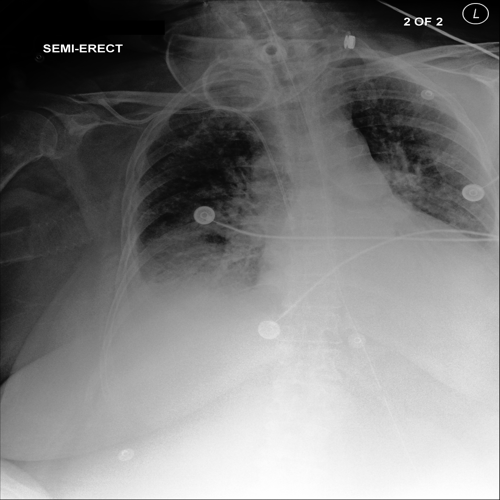

METADATA

+---------------+-------------------------------------------------+
| label         | findings                                        |
|---------------+-------------------------------------------------|
| PE and Others | Lung Opacity, Pleural Effusion, Support Devices |
+---------------+-------------------------------------------------+


2024-05-01 07:47:31,399 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:31,400 - src.cnn_pe - INFO - Preparing the dataset
2024-05-01 07:47:32,320 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:32,321 - src.cnn_pe - INFO - Preparing the dataset
2024-05-01 07:47:32,575 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:32,576 - src.cnn_pe - INFO - Preparing the dataset
2024-05-01 07:47:32,914 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:32,915 - src.cnn_pe - INFO - Preparing the dataset
2024-05-01 07:47:33,084 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:33,084 - src.cnn_pe - INFO - Preparing the dataset



MODEL RESULTS

+-----------+--------------+---------+
| Model     |   Prediction |   Label |
|-----------+--------------+---------|
| RESNET    |            1 |       1 |
| GOOGLENET |            1 |       1 |
| UNET      |            1 |       1 |
| DENSENET  |            1 |       1 |
| BASELINE  |            1 |       1 |
+-----------+--------------+---------+

EXAMPLE 2



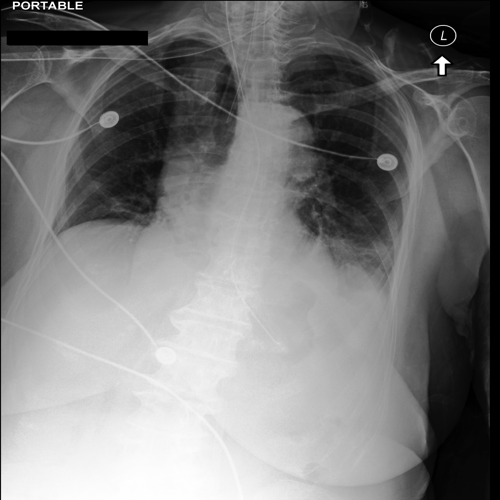

METADATA

+---------------+-------------------------------------------------+
| label         | findings                                        |
|---------------+-------------------------------------------------|
| PE and Others | Lung Opacity, Pleural Effusion, Support Devices |
+---------------+-------------------------------------------------+


2024-05-01 07:47:33,435 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:33,436 - src.cnn_pe - INFO - Preparing the dataset
2024-05-01 07:47:34,006 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:34,006 - src.cnn_pe - INFO - Preparing the dataset
2024-05-01 07:47:34,137 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:34,138 - src.cnn_pe - INFO - Preparing the dataset
2024-05-01 07:47:34,412 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:34,412 - src.cnn_pe - INFO - Preparing the dataset
2024-05-01 07:47:34,479 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:34,479 - src.cnn_pe - INFO - Preparing the dataset



MODEL RESULTS

+-----------+--------------+---------+
| Model     |   Prediction |   Label |
|-----------+--------------+---------|
| RESNET    |            1 |       1 |
| GOOGLENET |            1 |       1 |
| UNET      |            1 |       1 |
| DENSENET  |            1 |       1 |
| BASELINE  |            0 |       1 |
+-----------+--------------+---------+

================================================== PE ONLY ==================================================

EXAMPLE 1



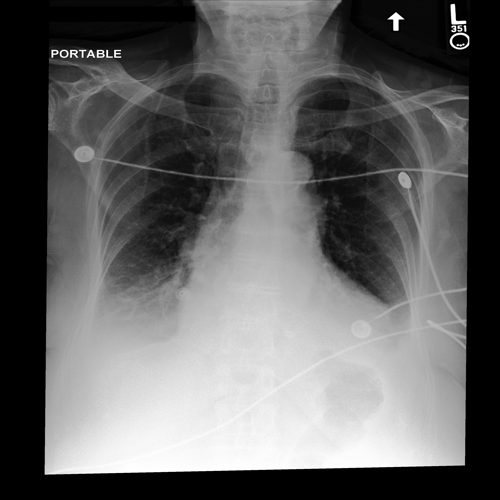

METADATA

+---------+------------------+
| label   | findings         |
|---------+------------------|
| PE Only | Pleural Effusion |
+---------+------------------+


2024-05-01 07:47:34,810 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:34,810 - src.cnn_pe - INFO - Preparing the dataset
2024-05-01 07:47:35,417 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:35,418 - src.cnn_pe - INFO - Preparing the dataset
2024-05-01 07:47:35,549 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:35,550 - src.cnn_pe - INFO - Preparing the dataset
2024-05-01 07:47:35,820 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:35,821 - src.cnn_pe - INFO - Preparing the dataset
2024-05-01 07:47:35,886 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:35,886 - src.cnn_pe - INFO - Preparing the dataset



MODEL RESULTS

+-----------+--------------+---------+
| Model     |   Prediction |   Label |
|-----------+--------------+---------|
| RESNET    |            1 |       1 |
| GOOGLENET |            1 |       1 |
| UNET      |            0 |       1 |
| DENSENET  |            1 |       1 |
| BASELINE  |            0 |       1 |
+-----------+--------------+---------+

EXAMPLE 2



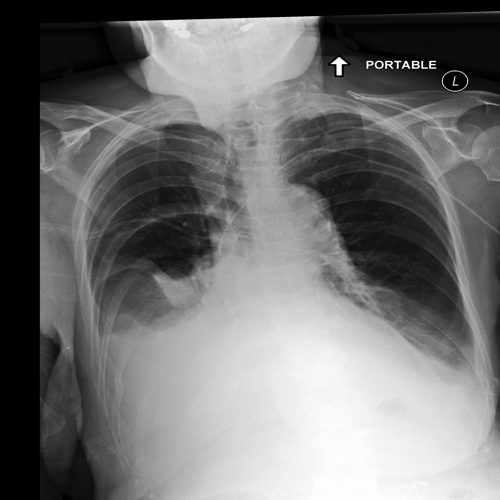

METADATA

+---------+------------------+
| label   | findings         |
|---------+------------------|
| PE Only | Pleural Effusion |
+---------+------------------+


2024-05-01 07:47:36,222 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:36,223 - src.cnn_pe - INFO - Preparing the dataset
2024-05-01 07:47:36,813 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:36,813 - src.cnn_pe - INFO - Preparing the dataset
2024-05-01 07:47:36,947 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:36,948 - src.cnn_pe - INFO - Preparing the dataset
2024-05-01 07:47:37,225 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:37,225 - src.cnn_pe - INFO - Preparing the dataset
2024-05-01 07:47:37,296 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:37,296 - src.cnn_pe - INFO - Preparing the dataset



MODEL RESULTS

+-----------+--------------+---------+
| Model     |   Prediction |   Label |
|-----------+--------------+---------|
| RESNET    |            1 |       1 |
| GOOGLENET |            1 |       1 |
| UNET      |            1 |       1 |
| DENSENET  |            1 |       1 |
| BASELINE  |            1 |       1 |
+-----------+--------------+---------+

================================================== NO FINDING ==================================================

EXAMPLE 1



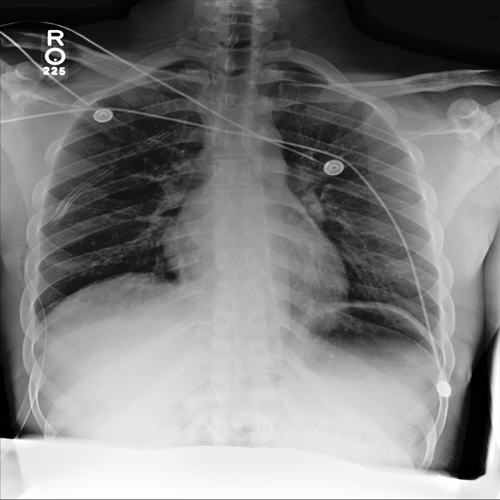

METADATA

+------------+------------+
| label      | findings   |
|------------+------------|
| No Finding | No Finding |
+------------+------------+


2024-05-01 07:47:37,635 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:37,636 - src.cnn_pe - INFO - Preparing the dataset
2024-05-01 07:47:38,382 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:38,382 - src.cnn_pe - INFO - Preparing the dataset
2024-05-01 07:47:38,589 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:38,590 - src.cnn_pe - INFO - Preparing the dataset
2024-05-01 07:47:38,921 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:38,922 - src.cnn_pe - INFO - Preparing the dataset
2024-05-01 07:47:38,995 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:38,996 - src.cnn_pe - INFO - Preparing the dataset



MODEL RESULTS

+-----------+--------------+---------+
| Model     |   Prediction |   Label |
|-----------+--------------+---------|
| RESNET    |            0 |       0 |
| GOOGLENET |            0 |       0 |
| UNET      |            0 |       0 |
| DENSENET  |            0 |       0 |
| BASELINE  |            0 |       0 |
+-----------+--------------+---------+

EXAMPLE 2



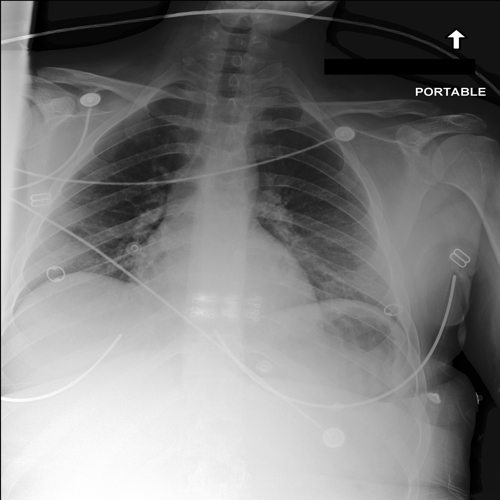

METADATA

+------------+------------+
| label      | findings   |
|------------+------------|
| No Finding | No Finding |
+------------+------------+


2024-05-01 07:47:39,378 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:39,379 - src.cnn_pe - INFO - Preparing the dataset
2024-05-01 07:47:40,045 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:40,046 - src.cnn_pe - INFO - Preparing the dataset
2024-05-01 07:47:40,199 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:40,200 - src.cnn_pe - INFO - Preparing the dataset
2024-05-01 07:47:40,564 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:40,565 - src.cnn_pe - INFO - Preparing the dataset
2024-05-01 07:47:40,734 - src.cnn_pe - INFO - Predicting
2024-05-01 07:47:40,734 - src.cnn_pe - INFO - Preparing the dataset



MODEL RESULTS

+-----------+--------------+---------+
| Model     |   Prediction |   Label |
|-----------+--------------+---------|
| RESNET    |            0 |       0 |
| GOOGLENET |            1 |       0 |
| UNET      |            0 |       0 |
| DENSENET  |            0 |       0 |
| BASELINE  |            0 |       0 |
+-----------+--------------+---------+



In [5]:
for label in examples.keys():
    print("="*50 + f" {label.upper()} " + "="*50)
    print()
    for i in range(n_samples):
        print(f"EXAMPLE {i+1}")
        print("="*50)
        print()

        run_prediction(examples[label].select([i]))
        print()